<font size="+12"><center>
    MVPA analysis: SVM
</font></center>

Author:
Egor Ananyev

# Preparation

## Loading packages

In [1]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import mne
import pandas as pd
import os

In [2]:
mne.set_log_level('warning')  # less verbose output

## Setting parameters

In [3]:
interactive = False  # Whether to render interactive figures such as channel plots
# ...should be set to True on first pass

debug = False

cur_subj = 1
numof_runs = 7  # TEMP; is 7 for subj 01

## Loading evoked data

In [4]:
# data_path = os.path.expanduser("C:\\Users\\egora\\Downloads\\meg\\")
data_path = os.path.expanduser('E:\\meg\\')

cur_subj_str = str(cur_subj).zfill(2)

# epochs_list = []

for cur_run in range(numof_runs):
    cur_run_str = str(cur_run+1).zfill(2)
    fname = os.path.join(data_path,
                             'derivatives\\meg_derivatives\\sub-' + cur_subj_str + '\\ses-meg\\meg\\sub-' + \
                             cur_subj_str + '_ses-meg_experimental_run-' + cur_run_str + '_proc-sss_300_epo.fif')
    print(fname)
    epochs_run = mne.read_epochs(fname)
    # example append: https://www.programcreek.com/python/example/92634/mne.Epochs
#     epochs_list.append(epochs_run)
    epochs_run = epochs_run.pick_types(meg=True)
    epochs_run_df = epochs_run.to_data_frame()
    # Normalizing the signal by the baseline:
    epochs_run_std = epochs_run_df.sort_index(level=['condition', 'epoch', 'time'], ascending=[1, 1, 1])
    epochs_run_std = epochs_run_std.loc[pd.IndexSlice[:, :, -100:-1], :].groupby(['condition', 'epoch']).std()
    epochs_run_norm = epochs_run_df / epochs_run_std
    if cur_run == 0:
        epochs_df = epochs_run_norm
    else: 
        epochs_df = epochs_df.append(epochs_run_norm)

E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-01_proc-sss_300_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-02_proc-sss_300_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-03_proc-sss_300_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-04_proc-sss_300_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-05_proc-sss_300_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-06_proc-sss_300_epo.fif
E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg\sub-01_ses-meg_experimental_run-07_proc-sss_300_epo.fif


In [5]:
np.shape(epochs_df)

(212477, 306)

In [6]:
epochs_df.columns

Index(['MEG0111', 'MEG0112', 'MEG0113', 'MEG0121', 'MEG0122', 'MEG0123',
       'MEG0131', 'MEG0132', 'MEG0133', 'MEG0141',
       ...
       'MEG2613', 'MEG2621', 'MEG2622', 'MEG2623', 'MEG2631', 'MEG2632',
       'MEG2633', 'MEG2641', 'MEG2642', 'MEG2643'],
      dtype='object', name='channel', length=306)

In [7]:
epochs_df.index

MultiIndex([( 'left/dur1/cont017',  0, -100),
            ( 'left/dur1/cont017',  0,  -97),
            ( 'left/dur1/cont017',  0,  -93),
            ( 'left/dur1/cont017',  0,  -90),
            ( 'left/dur1/cont017',  0,  -87),
            ( 'left/dur1/cont017',  0,  -83),
            ( 'left/dur1/cont017',  0,  -80),
            ( 'left/dur1/cont017',  0,  -77),
            ( 'left/dur1/cont017',  0,  -73),
            ( 'left/dur1/cont017',  0,  -70),
            ...
            ('right/dur4/cont100', 80,  570),
            ('right/dur4/cont100', 80,  573),
            ('right/dur4/cont100', 80,  577),
            ('right/dur4/cont100', 80,  580),
            ('right/dur4/cont100', 80,  583),
            ('right/dur4/cont100', 80,  587),
            ('right/dur4/cont100', 80,  590),
            ('right/dur4/cont100', 80,  593),
            ('right/dur4/cont100', 80,  597),
            ('right/dur4/cont100', 80,  600)],
           names=['condition', 'epoch', 'time'], length=212477)

In [8]:
epochs_df

channel                         MEG0111   MEG0112   MEG0113   MEG0121  \
condition          epoch time                                           
left/dur1/cont017  0     -100  1.576067 -1.029522  0.571275  0.491981   
                         -97   0.553957  1.626679 -0.112674 -0.431652   
                         -93  -0.279769  2.322377 -0.267687 -1.575911   
                         -90   0.522749  0.226120  0.893295 -1.309778   
                         -87   0.293753  0.441796  0.232567 -0.783006   
...                                 ...       ...       ...       ...   
right/dur4/cont100 80     587 -0.167930 -1.786224 -3.949863  2.572864   
                          590 -0.474831  0.427726 -4.605781  2.374211   
                          593 -0.942890  1.387941 -4.254599  1.293214   
                          597 -0.754338 -0.794540 -3.232324  1.486582   
                          600 -0.628704 -0.707739 -3.467270  1.626736   

channel                         MEG0122   MEG0123   MEG0131   MEG0132  \
condition          epoch time                                           
left/dur1/cont017  0     -100  1.058599 -0.493659  0.663217  0.705375   
                         -97   0.518709  0.751502  0.000823  0.841055   
                         -93   0.892310  0.535878 -0.401346  1.689365   
                         -90   1.095882 -0.012185 -0.096783  1.585785   
                         -87   1.216999  0.366995 -0.292678  0.982597   
...                                 ...       ...       ...       ...   
right/dur4/cont100 80     587 -0.568288 -1.272248  0.698832 -0.696469   
                          590 -2.004040 -0.308461  0.481093 -0.424927   
                          593 -2.234754 -0.672880 -0.247038  0.638557   
                          597 -1.446546 -1.652420 -0.627605  0.637537   
                          600 -1.763028 -1.177448 -0.554681  0.485943   

channel                         MEG0133   MEG0141  ...   MEG2613   MEG2621  \
condition          epoch time                      ...                       
left/dur1/cont017  0     -100 -0.142850  0.806979  ...  1.566507 -0.320609   
                         -97   0.164376  0.925319  ...  1.852537  0.701891   
                         -93   1.405414  0.939116  ...  1.718926  1.992536   
                         -90   1.705368  0.958678  ...  1.127426  0.694928   
                         -87   1.250537  0.805790  ...  1.220103  0.344151   
...                                 ...       ...  ...       ...       ...   
right/dur4/cont100 80     587 -2.553035 -0.457694  ... -4.023089  0.223301   
                          590 -2.576332 -0.439530  ... -3.812698  0.246519   
                          593 -1.360856 -0.768171  ... -3.168895  0.041388   
                          597 -2.971802 -0.941390  ... -3.041159  0.223355   
                          600 -3.810544 -0.852254  ... -3.120419  0.565635   

channel                         MEG2622   MEG2623   MEG2631   MEG2632  \
condition          epoch time                                           
left/dur1/cont017  0     -100  1.098164 -0.568150 -0.681471  0.436580   
                         -97   1.580174  1.762313  0.305857  0.453597   
                         -93   1.525474  1.623664  1.588214  1.504487   
                         -90   0.967500 -1.416325  0.141986  1.843892   
                         -87   0.157583 -0.593685  0.242331  0.891950   
...                                 ...       ...       ...       ...   
right/dur4/cont100 80     587 -1.035666  1.615875  0.390150  0.163755   
                          590 -1.153710  1.372623  0.536086 -0.088942   
                          593 -1.678995  1.903183  0.600947 -0.834262   
                          597 -2.236237  1.978202  1.009804 -0.769130   
                          600 -2.088028  1.867654  1.373922 -0.603343   

channel                         MEG2633   MEG2641   MEG2642   MEG2643  
condition          epoch time                                  

The path to store MVPA-related data and visualization.

In [9]:
mvpa_path = os.path.join(data_path, 'derivatives\\meg_derivatives\\sub-' + cur_subj_str + '\\ses-meg\\meg-mvpa\\')
mvpa_fname = os.path.join(mvpa_path, 'sub-' + cur_subj_str)
print(mvpa_fname)

E:\meg\derivatives\meg_derivatives\sub-01\ses-meg\meg-mvpa\sub-01


## Examining raw data

In [10]:
%matplotlib qt
if interactive:
    raw.plot()

# Support Vector Machines

In [11]:
from sklearn import svm

## Logic of SVM-based classification

In [12]:
## In principle (from https://scikit-learn.org/stable/modules/svm.html):
X = [[0, 0], [1, 1], [2, 2]]  # channel measurements [n_features] on all but one trial [n_samples] at time t
y = [0, 1, 1]                 # stimulus orientation with length [n_samples]
clf = svm.LinearSVC()         # linear Support Vector Classification
clf.fit(X, y)                 # model fitting
clf.predict([[3, 3]])         # model testing on the remaining trial at time t

array([1])

In [13]:
np.shape(X)  # array of size [n_samples, n_features]

(3, 2)

## SVM routine

In [17]:
def run_svm(X_, y_):
    preds = []
    for cur_test_epoch in range(len(y_)):
#         print(cur_test_epoch)
        test_epoch = [X_[cur_test_epoch, :]]
        test_class = y_[cur_test_epoch]
        train_epochs = X_[np.arange(len(y_))!=cur_test_epoch, :]
        train_classes = y_[np.arange(len(y_))!=cur_test_epoch]
        clf = svm.LinearSVC()
        clf.fit(train_epochs, train_classes)
        preds.append(clf.predict(test_epoch).item(0))
    acc_ = sum(y_ == np.array(preds)) / len(y_)
    return acc_

# Separate conditions with independent_t_

## Setting up routine for time _t_

In [14]:
# epochs = epochs_list[0]  # TEMP
# epochs = epochs.pick_types(meg=True)

In [15]:
# all_times = np.round(epochs.times * 1000).astype(int)
all_times = np.round(epochs_run.times * 1000).astype(int)
# print(all_times)
print(np.shape(all_times))

(211,)


In [16]:
all_durs = [1, 2, 3, 4]
all_conts = [17, 33, 50, 100]

In [18]:
def iter_times(all_times_, epochs_subset_df_, cur_cond_str_):
    acc_ = []
    counter = 0
    print('[', end='')
    for t in all_times_:
#         print(str(t), end =' ') 
        if (counter == int(len(all_times)/10)):
            print('=', end='')
            counter = 0
        counter += 1
        X_right = epochs_subset_df_.loc[('right/'+cur_cond_str_, slice(None), t), :].values
        X_left = epochs_subset_df_.loc[('left/'+cur_cond_str_, slice(None), t), :].values
        X = np.concatenate((X_right, X_left))
    #     print(np.shape(X))
        y = np.concatenate((np.repeat(1, len(X_right)), np.repeat(0, len(X_left))))
    #     print(np.shape(y))
        acc_.append(run_svm(X, y))
    print(']')
    return acc_

In [19]:
# print(len(all_times))
# print(int(len(all_times)/10))
# print('[', end='')
# counter = 0
# for t in all_times:
#     if (counter == int(len(all_times)/10)):
#         print('=', end='')
#         counter = 0
#     counter += 1
# #     print(t, end=' ')
# print(']', end='')

In [20]:
acc_index = pd.MultiIndex.from_product([all_durs, all_conts], names=['dur', 'cont'])
acc = pd.DataFrame(np.zeros((len(all_durs)*len(all_conts), len(all_times))),
                   index=acc_index, columns=all_times)
acc.head()

-100  -97   -93   -90   -87   -83   -80   -77   -73   -70   ...  \
dur cont                                                              ...   
1   17     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
    33     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
    50     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
    100    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2   17     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

           570   573   577   580   583   587   590   593   597   600  
dur cont                                                              
1   17     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
    33     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
    50     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
    100    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   17     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 211 columns]

In [21]:
# TEMP
# cur_dur = 1
# cur_cont = 1
# cur_cond_str = 'dur' + str(all_durs[cur_dur]) + '/' + 'cont' + str(all_conts[cur_cont]).zfill(3)
# print(cur_cond_str)
# epochs_subset_df = epochs_df[epochs_df.index.get_level_values('condition').str.contains(cur_cond_str)]
# t = 100
# X_right = epochs_subset_df.loc[('right/'+cur_cond_str, slice(None), t), :].values
# X_left = epochs_subset_df.loc[('left/'+cur_cond_str, slice(None), t), :].values
# X = np.concatenate((X_right, X_left))
# y = np.concatenate((np.repeat(1, len(X_right)), np.repeat(0, len(X_left))))
# run_svm(X, y)
# cur_acc = iter_times(all_times, epochs_df, cur_cond_str)

In [22]:
# toy example
# df = pd.DataFrame({'one': pd.Series([1., 2., 3.], index=['a', 'b', 'ca']), 'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'ca', 'd'])})
# print(df.index.str.contains('a'))
# df[df.index.str.contains('a')]

In [23]:
# This suppresses the sklearn warnings
# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

In [24]:
for cur_dur in range(len(all_durs)):
    for cur_cont in range(len(all_conts)):
        cur_cond_str = 'dur' + str(all_durs[cur_dur]) + '/' + 'cont' + str(all_conts[cur_cont]).zfill(3)
        print(cur_cond_str, end=' ')
#         epochs_subset = epochs[cur_cond_str];
#         epochs_subset_df = epochs_df.loc[(cur_cond_str, slice(None), slice(None)), :].values
        epochs_subset_df = epochs_df[epochs_df.index.get_level_values('condition').str.contains(cur_cond_str)]
#         print(epochs_subset)
#         epochs_df = epochs_subset.to_data_frame()
#         print(epochs_df.iloc[:,0:4].head());
#         print(epochs_df.columns.values[0:21])
        cur_acc = iter_times(all_times, epochs_df, cur_cond_str)
#         print(cur_acc)
        acc.loc[(all_durs[cur_dur], all_conts[cur_cont]), :] = cur_acc

dur1/cont017 [==========]
dur1/cont033 [==========]
dur1/cont050 [==========]
dur1/cont100 [==========]
dur2/cont017 [==========]
dur2/cont033 [==========]
dur2/cont050 [==========]
dur2/cont100 [==========]
dur3/cont017 [==========]
dur3/cont033 [==========]
dur3/cont050 [==========]
dur3/cont100 [==========]
dur4/cont017 [==========]
dur4/cont033 [==========]
dur4/cont050 [==========]
dur4/cont100 [==========]


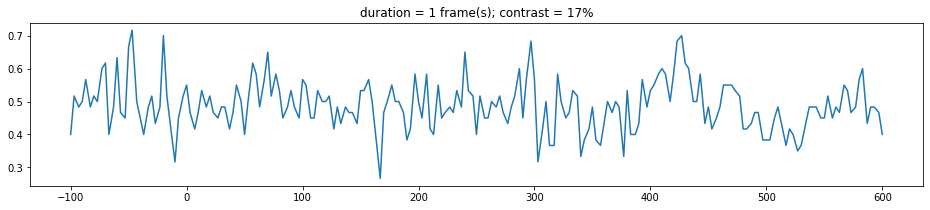

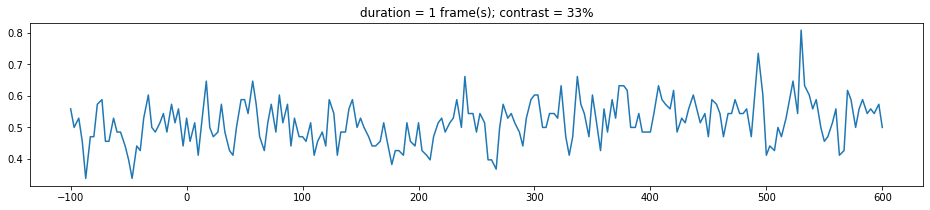

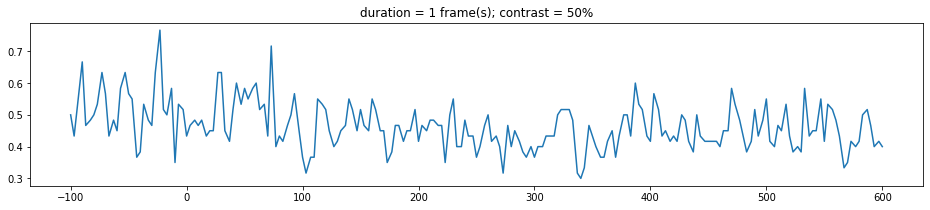

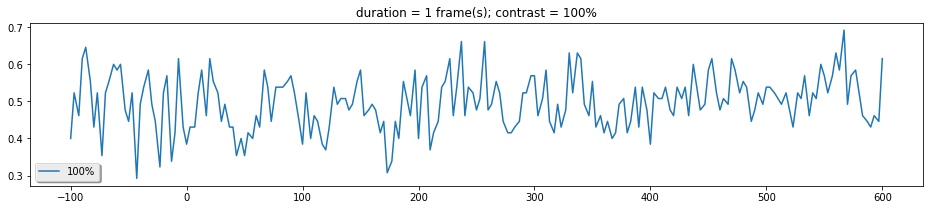

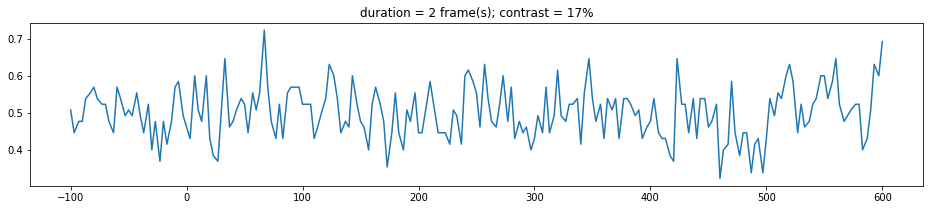

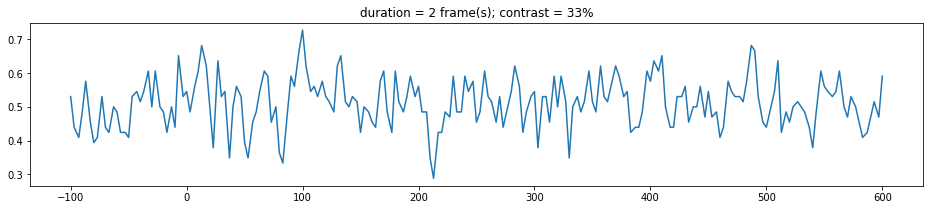

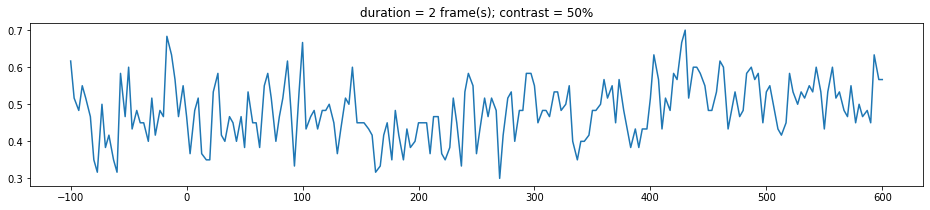

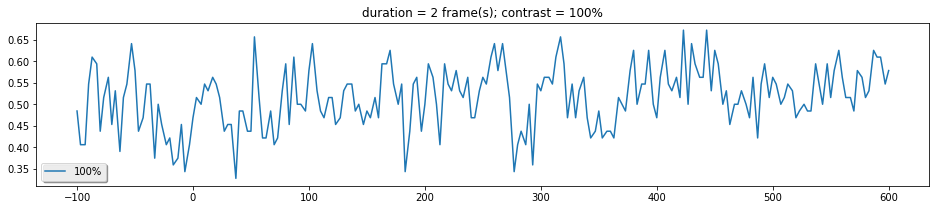

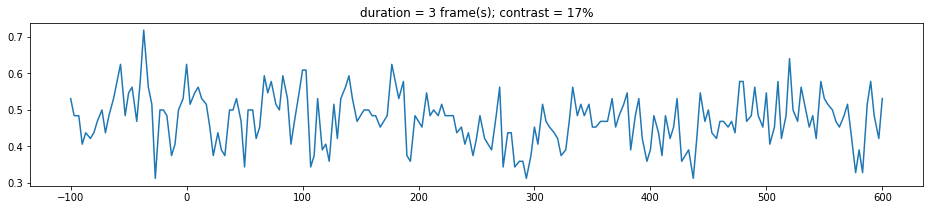

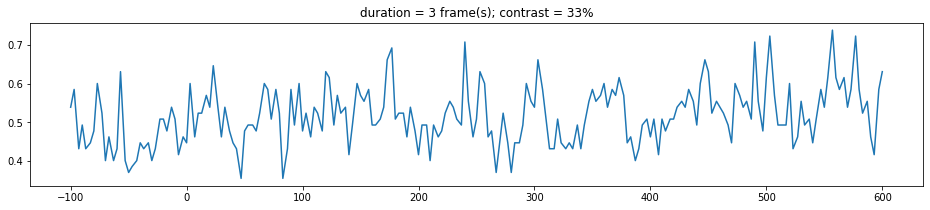

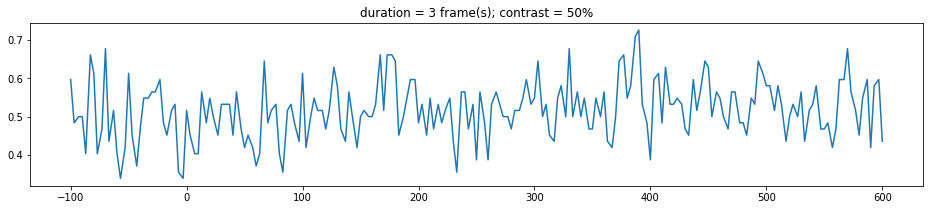

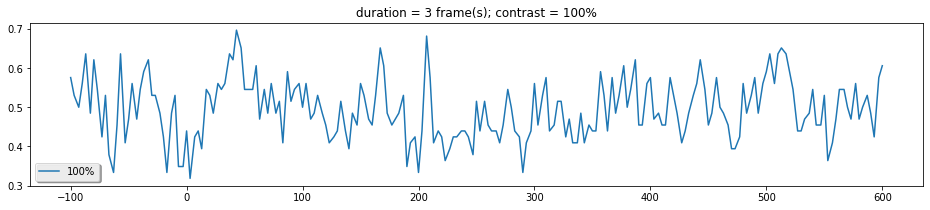

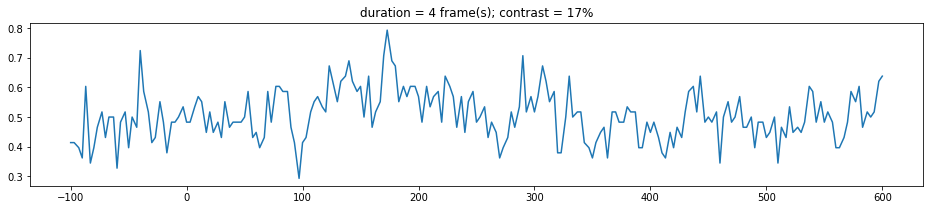

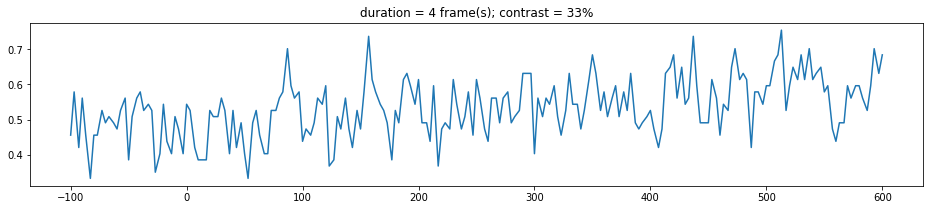

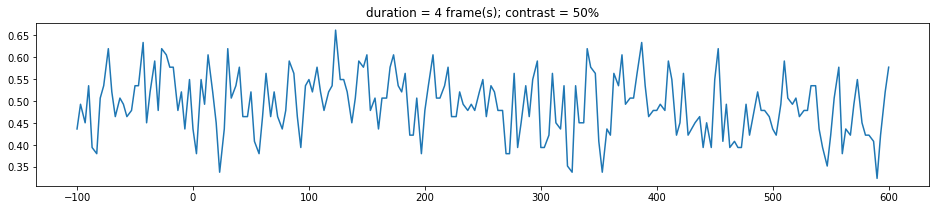

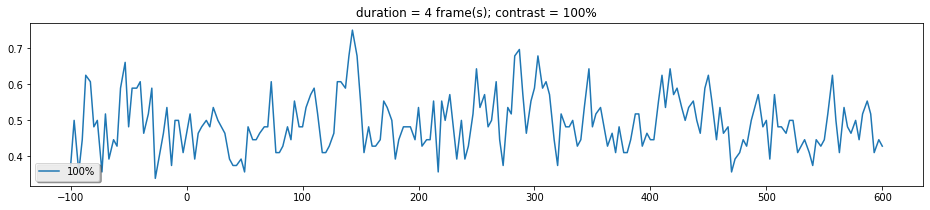

In [29]:
%matplotlib inline
for cur_dur in range(len(all_durs)):
#     plt.title(label='duration = ' + str(all_durs[cur_dur]) + ' frame(s)')  # ; contrast = ' + str(all_conts[cur_cont]) + '%'
    for cur_cont in range(len(all_conts)):
        plt.figure(figsize=(16, 3))
        plt.title(label='duration = ' + str(all_durs[cur_dur]) + ' frame(s); contrast = ' + str(all_conts[cur_cont]) + '%')
        plt.plot(all_times, np.array(acc.loc[(all_durs[cur_dur], all_conts[cur_cont]), :]).T, label = str(all_conts[cur_cont]) + '%');
        # plt.savefig(qc_fname + '_light-sensors.pdf')
    leg = plt.legend(loc='lower left', ncol=4, shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.8)

In [30]:
acc.to_csv(mvpa_fname + '_acc.csv')

# P.S.

In [27]:
%matplotlib
%matplotlib qt

Using matplotlib backend: Qt5Agg


In [28]:
interactive = True